In [1]:
#preprocessamento
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import heartpy as hp
import pandas as pd
import wfdb

In [2]:
import pandas as pd
dataset=pd.read_csv("Nova pasta/drive17b.txt",delimiter="\t")
dataset

,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,0.000,-0.009,0.497,17.997,17.997,70.0,15.86,50.00
1,0.065,-0.026,0.104,18.026,18.019,70.0,10.22,50.04
2,0.129,0.219,0.435,17.982,17.984,70.0,10.17,49.98
3,0.194,0.159,0.373,17.896,17.925,70.0,10.15,49.88
4,0.258,0.065,0.083,17.923,17.972,70.0,10.19,49.90
...,...,...,...,...,...,...,...,...
23650,1525.806,0.592,0.394,1.074,4.252,78.0,12.21,51.11
23651,1525.871,0.461,0.394,1.076,4.284,78.0,12.21,51.48
23652,1525.935,0.466,0.456,1.076,4.319,78.0,12.21,51.73
23653,1526.000,0.515,0.331,1.076,4.341,78.0,12.21,51.94


In [3]:
dataset.columns

Index(['          time', '    ECG', '    EMG', '  GSR1', '  GSR2', '  HR',
       ' marker', '   RESP'],
      dtype='object')

In [4]:
dataset.to_csv (r'Nova pasta\drive18.csv', index=None)

In [5]:
x = pd.read_csv("Nova pasta/drive18.csv")
x

,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,0.000,-0.009,0.497,17.997,17.997,70.0,15.86,50.00
1,0.065,-0.026,0.104,18.026,18.019,70.0,10.22,50.04
2,0.129,0.219,0.435,17.982,17.984,70.0,10.17,49.98
3,0.194,0.159,0.373,17.896,17.925,70.0,10.15,49.88
4,0.258,0.065,0.083,17.923,17.972,70.0,10.19,49.90
...,...,...,...,...,...,...,...,...
23650,1525.806,0.592,0.394,1.074,4.252,78.0,12.21,51.11
23651,1525.871,0.461,0.394,1.076,4.284,78.0,12.21,51.48
23652,1525.935,0.466,0.456,1.076,4.319,78.0,12.21,51.73
23653,1526.000,0.515,0.331,1.076,4.341,78.0,12.21,51.94


In [6]:
x.columns

Index(['          time', '    ECG', '    EMG', '  GSR1', '  GSR2', '  HR',
       ' marker', '   RESP'],
      dtype='object')

In [7]:
data = hp.get_data('Nova pasta/teste18.csv',column_name ='ECG')

In [8]:
mstimer_data = hp.get_data('Nova pasta/teste18.csv', column_name='time')

fs = hp.get_samplerate_mstimer(mstimer_data*1000)
print(fs)

15.500650365482466


In [9]:
data

array([-0.009, -0.026,  0.219, ...,  0.466,  0.515,  0.481])

In [10]:
enhanced = hp.enhance_peaks(data, iterations=2)
enhanced

array([2.66413784e-08, 1.85558155e-06, 9.34034920e-03, ...,
       1.91483043e-01, 2.85637728e-01, 2.17353661e-01])

In [11]:
working_data, measures = hp.process(data, fs, report_time=True)


Finished in 11.68970 sec


In [12]:
measures

{'bpm': 153.80534624642937,
 'ibi': 390.10347471190664,
 'sdnn': 138.6714564181402,
 'sdsd': 86.1477946432706,
 'rmssd': 245.70936712362064,
 'pnn20': 0.9924749163879598,
 'pnn50': 0.9924749163879598,
 'hr_mad': 64.51342210949065,
 'sd1': 173.70731991202905,
 'sd2': 86.75377139695922,
 's': 47343.063397425925,
 'sd1/sd2': 2.0023028061477177,
 'breathingrate': 1.2793689591317463}

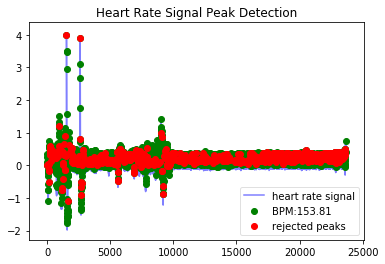

In [13]:
hp.plotter(working_data, measures)

In [14]:
wor, me = hp.process_segmentwise(data, sample_rate=fs)

In [15]:
z = pd.DataFrame.from_dict(me)
z

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,segment_indices
0,94.000000,638.297872,182.812274,163.665942,263.463484,0.688889,0.688889,212.765957,186.293483,176.896474,103530.118314,1.053122,0.326103,"(0, 564)"
1,90.690141,661.593415,179.360552,165.498823,269.553729,0.697479,0.697479,212.765957,190.498417,169.223514,101274.930616,1.125721,0.342160,"(564, 1128)"
2,92.894118,645.896657,194.772122,170.631094,276.567525,0.689655,0.689655,212.765957,194.942484,187.402730,114771.030290,1.040233,0.041489,"(1128, 1692)"
3,91.143646,658.301509,171.442426,150.432585,262.350707,0.755102,0.755102,212.765957,185.198444,151.797240,88318.377504,1.220038,0.376677,"(1692, 2256)"
4,94.496042,634.947227,181.058885,149.098052,233.996495,0.666667,0.666667,212.765957,165.454305,184.997409,96159.808180,0.894360,0.347395,"(2256, 2820)"
5,93.751979,639.986491,172.677261,146.315561,274.679670,0.805556,0.805556,212.765957,194.047933,141.597501,86320.606265,1.370419,0.372204,"(2820, 3384)"
6,96.361809,622.653317,170.432338,136.803964,236.233327,0.741379,0.741379,212.765957,166.996866,165.905438,87039.986235,1.006579,0.307191,"(3384, 3948)"
7,92.870192,646.063053,182.519748,157.642245,250.179537,0.678261,0.678261,212.765957,176.782671,185.365069,102947.892543,0.953700,0.282578,"(3948, 4512)"
8,94.981723,631.700478,179.559445,143.175869,256.454055,0.773585,0.773585,212.765957,181.340401,165.422704,94240.929329,1.096224,0.220994,"(4512, 5076)"
9,92.712329,647.163121,187.096648,157.662302,259.713949,0.710000,0.710000,212.765957,183.639332,183.639332,105945.199063,1.000000,0.347826,"(5076, 5640)"


In [16]:
db = pd.read_csv("Nova pasta/teste17.csv")
db

,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,0.000,-0.036,0.166,1.375,4.994,77.0,11.16,38.33
1,0.067,0.099,0.166,1.375,4.993,85.0,11.16,38.39
2,0.133,0.080,0.186,1.375,4.992,85.0,11.16,38.45
3,0.200,-0.088,0.186,1.375,4.990,85.0,11.16,38.47
4,0.267,-0.079,0.207,1.375,4.988,85.0,11.16,38.48
...,...,...,...,...,...,...,...,...
26127,1741.800,0.018,0.331,5.726,8.989,77.0,9.74,38.97
26128,1741.867,0.108,0.435,5.721,8.979,85.0,9.74,38.88
26129,1741.933,0.255,0.414,5.716,8.968,85.0,9.74,38.86
26130,1742.000,0.091,0.559,5.709,8.956,85.0,9.76,38.84


In [18]:
cons= 60

In [24]:
select_color = db.loc[db['time'] < cons]
s = select_color.mean()
n = pd.DataFrame.from_dict(s)
t = n.transpose()
t

,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,21.166667,-0.01608,0.204445,1.311921,4.557055,73.52044,11.35772,37.243648


In [25]:
for i in range(1,42):
    sel = db.loc[(db['time'] > cons*i) & (db['time']< cons*(i+1))]
    a = sel.mean()
    j = pd.DataFrame.from_dict(a)
    m = j.transpose()
    t = pd.concat([t,m],ignore_index=True)
t

,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,21.166667,-0.016080,0.204445,1.311921,4.557055,73.520440,11.357720,37.243648
1,63.600000,-0.011655,0.209444,1.217589,3.924620,71.907087,10.789402,37.189370
2,106.000000,-0.011523,0.206702,1.160391,3.539770,72.669291,10.650236,37.220740
3,148.366667,-0.006703,0.207858,1.126544,3.284064,74.610063,10.551572,37.256918
4,190.800000,-0.006123,0.203591,1.105398,3.110669,72.488189,10.476646,37.259197
5,233.200000,-0.007616,0.202915,1.087172,2.980825,72.387402,10.415638,37.152283
6,275.566667,-0.002928,0.202778,1.070558,2.873903,74.256289,10.375660,37.213852
7,318.000000,-0.006795,0.200351,1.058123,2.779931,68.548031,10.332346,37.263039
8,360.400000,-0.004351,0.200995,1.047236,2.716715,70.488189,10.279055,37.301669
9,402.766667,-0.005192,0.199091,1.038992,2.682476,71.397799,10.238160,37.189135


In [27]:
r = pd.concat([z,t],axis=1,join='inner')
r

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,...,breathingrate,segment_indices,time,ECG,EMG,GSR1,GSR2,HR,marker,RESP
0,94.000000,638.297872,182.812274,163.665942,263.463484,0.688889,0.688889,212.765957,186.293483,176.896474,...,0.326103,"(0, 564)",21.166667,-0.016080,0.204445,1.311921,4.557055,73.520440,11.357720,37.243648
1,90.690141,661.593415,179.360552,165.498823,269.553729,0.697479,0.697479,212.765957,190.498417,169.223514,...,0.342160,"(564, 1128)",63.600000,-0.011655,0.209444,1.217589,3.924620,71.907087,10.789402,37.189370
2,92.894118,645.896657,194.772122,170.631094,276.567525,0.689655,0.689655,212.765957,194.942484,187.402730,...,0.041489,"(1128, 1692)",106.000000,-0.011523,0.206702,1.160391,3.539770,72.669291,10.650236,37.220740
3,91.143646,658.301509,171.442426,150.432585,262.350707,0.755102,0.755102,212.765957,185.198444,151.797240,...,0.376677,"(1692, 2256)",148.366667,-0.006703,0.207858,1.126544,3.284064,74.610063,10.551572,37.256918
4,94.496042,634.947227,181.058885,149.098052,233.996495,0.666667,0.666667,212.765957,165.454305,184.997409,...,0.347395,"(2256, 2820)",190.800000,-0.006123,0.203591,1.105398,3.110669,72.488189,10.476646,37.259197
5,93.751979,639.986491,172.677261,146.315561,274.679670,0.805556,0.805556,212.765957,194.047933,141.597501,...,0.372204,"(2820, 3384)",233.200000,-0.007616,0.202915,1.087172,2.980825,72.387402,10.415638,37.152283
6,96.361809,622.653317,170.432338,136.803964,236.233327,0.741379,0.741379,212.765957,166.996866,165.905438,...,0.307191,"(3384, 3948)",275.566667,-0.002928,0.202778,1.070558,2.873903,74.256289,10.375660,37.213852
7,92.870192,646.063053,182.519748,157.642245,250.179537,0.678261,0.678261,212.765957,176.782671,185.365069,...,0.282578,"(3948, 4512)",318.000000,-0.006795,0.200351,1.058123,2.779931,68.548031,10.332346,37.263039
8,94.981723,631.700478,179.559445,143.175869,256.454055,0.773585,0.773585,212.765957,181.340401,165.422704,...,0.220994,"(4512, 5076)",360.400000,-0.004351,0.200995,1.047236,2.716715,70.488189,10.279055,37.301669
9,92.712329,647.163121,187.096648,157.662302,259.713949,0.710000,0.710000,212.765957,183.639332,183.639332,...,0.347826,"(5076, 5640)",402.766667,-0.005192,0.199091,1.038992,2.682476,71.397799,10.238160,37.189135


In [28]:
r.to_csv (r'Nova pasta\dt18.csv', index=None)